<a href="https://colab.research.google.com/github/vinayakpotdar2114/Capstone-Project-1-EDA-Global-Terrorism-Analysis/blob/main/Capstone_Project_1_EDA_Global_Terrorism_Analysis_Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Dataset:**

# **Global Terrorism Dataset**

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.


# **Problem Statement:**

**Explore and analyze the data to discover key findings pertaining to terrorist activities.**

# **The Structure of the Notebook:**



**1.**   **Required Library Imports**

**2.**   **Data Overview and Wrangling**
  *   Figuring out necessary columns.

**3. Null Value Analysis:**
  *   Understanding and analyzing if the null values represent a certain pattern

**4.** **Null Value Treatment:**
  *   Based on the Null Value Analysis, taking appropriate actions for the null values.

**5.** **Overall Exploration of the World Data**

**6.** **Utility/ Reusable function creation for deeper analysis for each country:**
  *   ***get_country_report(country)*** :: The function will give specific analysis and prepare charts for the countries passed as an argument in the utility function.


# 1.Required Library Imports and Data Drive Mounting


In [74]:
# Importing necessary libraries for plotting and data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# With this backend code, the output of plotting commands is displayed inline within frontends, directly below the code cell that produced it.
%matplotlib inline

In [75]:
# Mounting the drive consisting the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Loading the dataset to start working with it.
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT 1 EDA/Dataset/Global Terrorism Data.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [77]:
# The dataset is massive with multiple features, so it needs to be set at max columns display.
pd.set_option("display.max_columns",None)

In [78]:
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [79]:
data.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region                  region_txt  \
181686      182      Somalia      11          Sub-Saharan Africa   
181687      200        Syria      10  Middle East & North Africa   
181688      160  Philippines       5              Southeast Asia   
181689       92        India       6                  South Asia   
181690      160  Philippines       5              Southeast Asia   

              provstate           city   latitude   longitude  specificity  \
181686  Middle Shebelle  Ceelka Geelow   2.359673   45.385034          2.0   
181687         Lattakia         Jableh  35.407278   35.942679          1.0   
181688      Maguindanao       Kubentog   6.900742  124.437908          2.0   
181689          Manipur         Imphal  24.798346   93.940430          1.0   
181690      Maguindanao  Cotabato City   7.209594  124.241966          1.0   

        vicinity                                           location  \
181686         0     The incident occurred near the town of Balcad.   
181687         1     The incident occurred at the Humaymim Airport.   
181688         0  The incident occurred in the Datu Hoffer distr...   
181689         0  The incident occurred in the Mantripukhri neig...   
181690         0                                                NaN   

                                                  summary  crit1  crit2  \
181686  12/31/2017: Assailants opened fire on a Somali...      1      1   
181687  12/31/2017: Assailants launched mortars at the...      1      1   
181688  12/31/2017: Assailants set fire to houses in K...      1      1   
181689  12/31/2017: Assailants threw a grenade at a Fo...      1      1   
181690  12/31/2017: An explosive device was discovered...      1      1   

        crit3  doubtterr  alternative             alternative_txt  multiple  \
181686      0        1.0          1.0  Insurgency/Guerilla Action       0.0   
181687      0        1.0          1.0  Insurgency/Guerilla Action       0.0   
181688      1        0.0          NaN                         NaN       0.0   
181689      1        0.0          NaN                         NaN       0.0   
181690      1        0.0          NaN                         NaN       0.0   

        success  suicide  attacktype1                 attacktype1_txt  \
181686        1        0            2                   Armed Assault   
181687        1        0            3               Bombing/Explosion   
181688        1        0            7  Facility/Infrastructure Attack   
181689        0        0            3               Bombing/Explosion   
181690        0        0            3               Bombing/Explosion   

        attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
181686          NaN             NaN          NaN             NaN          4   
181687          NaN             NaN          NaN             NaN          4   
181688          NaN             NaN          NaN             NaN         14   
181689          NaN             NaN          NaN             NaN          2   
181690          NaN             NaN          NaN             NaN         20   

                      targtype1_txt  targsubtype1  \
181686                     Military          36.0   
181687                     Military          27.0   
181688  Private Citizens & Property          76.0   
181689         Government (General)          21.0   
181690                      Unknown           NaN   

                                     targsubtype1_txt  \
181686                       

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [81]:
# Lets get some numerical data out of the dataset.
data.describe()

# The data needs to be arranged a bit differently for our easier understanding. 

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

# 2. Data Overview and Wrangling



*  Major chunk of the data is tricky to understand and shows less relevance in the first glance. Let's pick out the coulmns that can be easily used to squeeze out most of the insights. 
*   Renaming of these features will make the data more handy, so let us begin with that.

   


In [82]:
# Renaming the columns for ease of use and better understanding.

data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [83]:
data.head(2)

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   

              Country  region                       Region    state  \
0  Dominican Republic       2  Central America & Caribbean      NaN   
1              Mexico       1                North America  Federal   

            city   latitude  longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792 -69.951164          1.0         0      NaN   
1    Mexico city  19.371887 -99.086624          1.0         0      NaN   

  Summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   

   multiple  success  suicide  attacktype1                   AttackType  \
0       0.0        1        0            1                Assassination   
1       0.0        1        0            6  Hostage Taking (Kidnapping)   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   

                   Target_type  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   

                         corp1                   Target  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   

  corp2 target2  natlty2 natlty2_txt  targtype3 targtype3_txt  targsubtype3  \
0   NaN     NaN      NaN         NaN        NaN           NaN           NaN   
1   NaN     NaN      NaN         NaN        NaN           NaN           NaN   

  targsubtype3_txt corp3 target3  natlty3 natlty3_txt  \
0              NaN   NaN     NaN      NaN         NaN   
1              NaN   NaN     NaN      NaN         NaN   

                                Group gsubname gname2 gsubname2 gname3  \
0                              MANO-D      NaN    NaN       NaN    NaN   
1  23rd of September Communist League      NaN    NaN       NaN    NaN   

  gsubname3 Motive  guncertain1  guncertain2  guncertain3  individual  nperps  \
0       NaN    NaN          0.0          NaN          NaN           0     NaN   
1       NaN    NaN          0.0          NaN          NaN           0     7.0   

   nperpcap  claimed  claimmode claimmode_txt  claim2  claimmode2  \
0       NaN      NaN        NaN           NaN     NaN         NaN   
1       NaN      NaN        NaN           NaN     NaN         NaN   

  claimmode2_txt  claim3  claimmode3 claimmode3_txt  compclaim  weaptype1  \
0            NaN     NaN         NaN            NaN        NaN         13   
1            NaN     NaN         NaN            NaN        NaN         13   

  Weapon_type  weapsubtype1 weapsubtype1_txt  weaptype2 weaptype2_txt  \
0     Unknown           NaN              NaN        NaN           NaN   
1     Unknown           NaN              NaN        NaN           NaN   

   weapsubtype2 weapsubtype2_txt  weaptype3 weaptype3_txt  weapsubtype3  \
0           NaN              NaN        NaN           NaN           NaN   
1           NaN              NaN        NaN           NaN           NaN   

  weapsubtype3_txt  weaptype4 weaptype4_txt  weapsubtype4 weapsubtype4_txt  \
0              NaN        NaN           NaN           NaN   

* Here we wont be needing all the present data, so let us extract the features that are required to us.

In [84]:
# Extracting the data with relatable and understandable columns, also making it more managable in the process.
data=data[['eventid','Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [85]:
data.head(2)

eventid  Year  Month  Day             Country    state  \
0  197000000001  1970      7    2  Dominican Republic      NaN   
1  197000000002  1970      0    0              Mexico  Federal   

                        Region           city   latitude  longitude  \
0  Central America & Caribbean  Santo Domingo  18.456792 -69.951164   
1                North America    Mexico city  19.371887 -99.086624   

                    AttackType  Killed  Wounded                   Target  \
0                Assassination     1.0      0.0             Julio Guzman   
1  Hostage Taking (Kidnapping)     0.0      0.0  Nadine Chaval, daughter   

  Summary                               Group                  Target_type  \
0     NaN                              MANO-D  Private Citizens & Property   
1     NaN  23rd of September Communist League      Government (Diplomatic)   

  Weapon_type Motive  success  
0     Unknown    NaN        1  
1     Unknown    NaN        1

In [86]:
data.shape

(181691, 20)

# 3. Null Value Analysis:

Understanding and analyzing if the null values represent a certain pattern

In [87]:
# Measuring the amount of null values in the current working dataset.
data.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
dtype: int64

Looking at the amount of missing data, we can clearly see that motive of the attacks,summary and the casualties(i.e. Killed and Wounded) are consisting most missing values.

*   The major chunk of missing motive can be handled by stating it as 'Unknown Motive'.Dropping this column won't make sense as we can still extract the motive where it is known. Here we will try to state the motive wherever it is present.
*   Summary column can be dropped, as it is not contributing much to the analysis process even where it is present.
*   Killed and Wounded can be left untouched for now, as we won't be analyzing the severity of the attack. The missing amount is also less than 10% of the column data.
*  We will still be removing the data in the rows with major data missing.

# 4. Null Value Treatment:

Based on the Null Value Analysis, taking appropriate actions for the null values.

In [88]:
# Replacing the missing motives with Unknown Motives.
data['Motive'] = data['Motive'].replace(np.nan, 'Unknown Motive')

In [89]:
# Replacing Missing cities with Unknown
data['city'] = data['city'].replace(np.nan,'Unknown')

In [90]:
# Removing the Summary column from the working dataset
data.drop(['Summary'],axis=1,inplace=True)

In [91]:
data.shape

(181691, 19)

# 5. Overall Exploration of the World Data

*   **Number of attacks per year**

  The following graph will help us understand the trend of attacks as the time passed.

In [92]:
yearly_attacks = data["Year"].value_counts().sort_index(ascending=True)

Text(0.5, 0, 'Years')

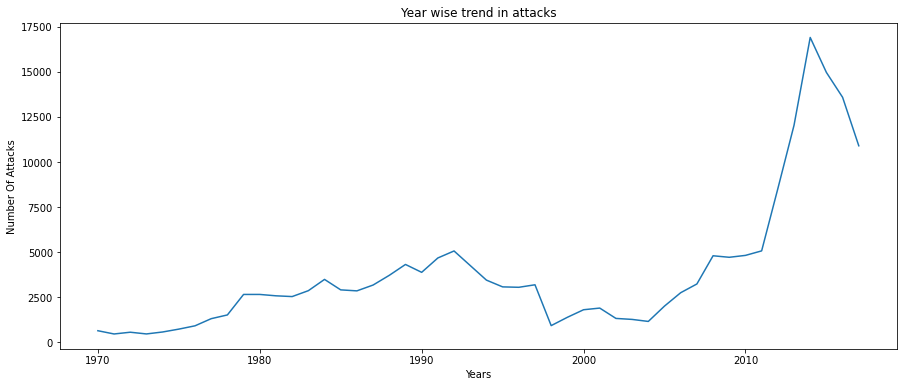

In [93]:
plt.subplots(figsize=(15,6))
yearly_attacks.plot()
plt.title('Year wise trend in attacks')
plt.ylabel('Number Of Attacks')
plt.xlabel('Years')

Looking at the above chart, we can obeserve **a massive upward trend** with occasional downs. 

The major uptrend started in the last decade of the data i.e. from 2007-08 to 2017. We know that the Financial Crisis of 2007-08 was one of the most prevalent event at this time period. This could also have been one of the factors in causing world unrest. There are two major factors which can be linked to the rise in the terrorist activities such as the political changes of the world and technological upgrades. 

Considering that the data does not consist of any such information about technology and political changes, we cannot relate this upward trend with any of those factors.

*   **Casualties per Year**

  The following graph will give us a brief understanding of the casualties due to the attacks



In [94]:
# Here, we will consider the wounded and the killed people as the casualties.
data['Casualties'] = data.Killed + data.Wounded

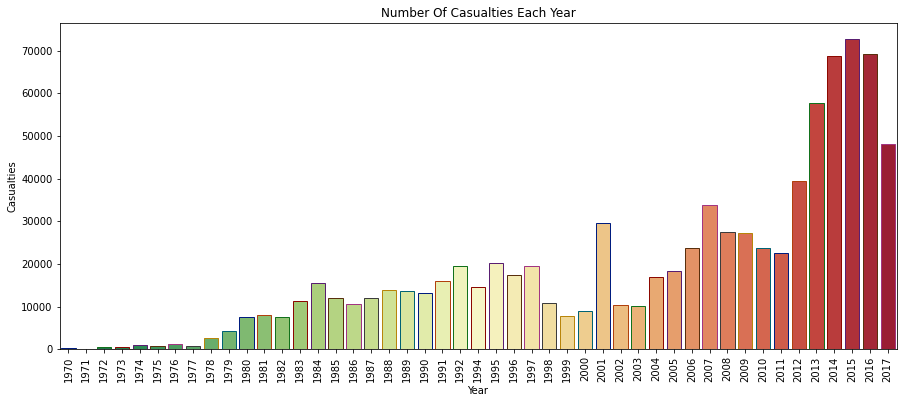

In [95]:
plt.subplots(figsize=(15,6))
year_casualties = data.groupby('Year').Casualties.sum().to_frame().reset_index()
year_casualties.columns = ['Year','Casualties']
sns.barplot(x=year_casualties.Year, y=year_casualties.Casualties, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualties Each Year')
plt.show()  

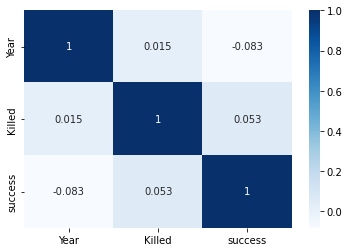

In [96]:
cordata=data[['Year','Killed','success']]
corr = cordata.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

As we see, there is very little positive relation between year and killed. This shows us that the attacks have increased by time.
The success and killed values are showing some greater positive relations.
These is no wonder that the yearly casualties graph, follows the similar trend as to the yearly attacks. A good thing that we can observe here is that Year and Success show a slight negative relation, indicating that the attacks are either being controlled and battled to reduce or prevented.

*  **Regions and Countries affected by Terrorism.**
  
  Let us analyse which regions are  mostly affected by these terrorist activities and try to get some insights into them.

In [97]:
mapdata = data[['Year','Country','latitude','longitude']]
fig = px.density_mapbox(mapdata,
                        lat='latitude',
                        lon='longitude', 
                        z='Year', 
                        radius=1,
                        center=dict(lat=22.804567, lon=86.202875), 
                        zoom=2,
                        mapbox_style="open-street-map",)

fig.show()

The above Heat World Map (Density Mapbox Plot) shows the attacks that have happened in every region. The darker spots show the older attacks in the brighter spots represent the recent attacks.

Just by looking at it we can see that the majority of the terrorist activities are reported in the **Middle Eastern region** followed by our beloved neighbour and **India**.

Lets get a more readable chart for this data and check which country and region are the most affected.

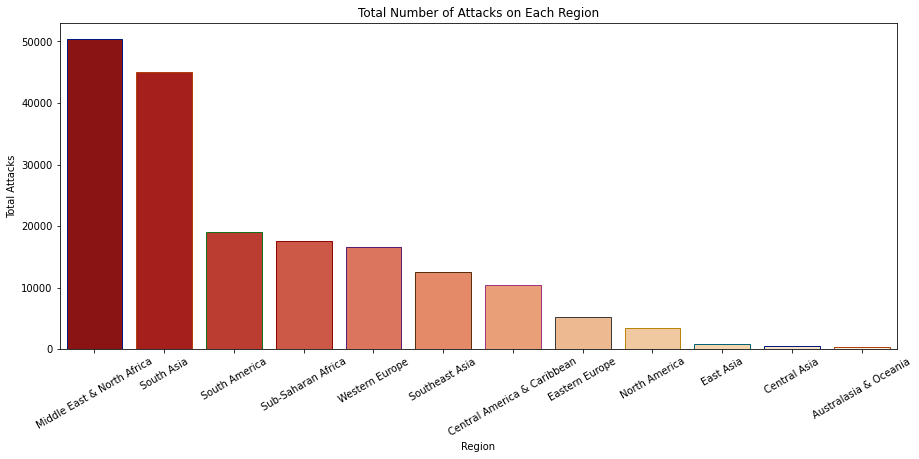

In [98]:
plt.subplots(figsize=(15,6))
region_attacks = data.Region.value_counts()[:15].reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Total Number of Attacks on Each Region')
plt.show()

As we deduces by just looking at the MapBox plot, Middle East and North Africa are the highly affected regions, followed by South Asia and South America.

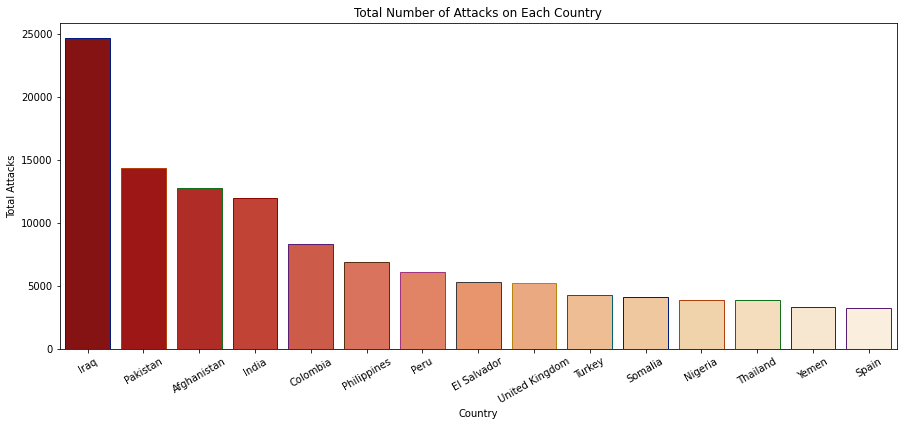

In [99]:
# Countries affected most by terrorism.

plt.subplots(figsize=(15,6))
country_attacks = data.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'OrRd_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Total Number of Attacks on Each Country')
plt.show()

**INSIGHTS:** 

As observed above, we can see that the Middle Eastern & North African region are majorly affected by the terrorist attacks, followed closely by South Asian region, which consists of India and Pakistan.

The majorly affected countries are Iraq, Pakistan, Afghanistan, India and Colombia respectively.

The difference between the first and the second country in terms of attacks shows a drastic difference. The difference is almost 50%.

Although it is a bit surprising that Pakistan has more attacks as compared to Afganistan, considering the deployment of U.S. troops into the country during that period.

* **The Major Troublemakers :**
  
  Now that we are aware of the regions and countries which are mostly affected, we shall try to understand which are the active Terrorist Organizations and Groups causing the chaos.

In [100]:
# Grouping the terrorist groups and counting their occurence with count method.
lead_terrorist_groups = data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:10]
# Dropping entries with unknown terrorist groups, because that will skew the data towards "Unknown" 


lead_terrorist_groups.columns=['Terrorist Organization','Number of Attacks']

# Creating a list of labels for the PIE chart
pilabels=list(lead_terrorist_groups['Terrorist Organization'].unique())

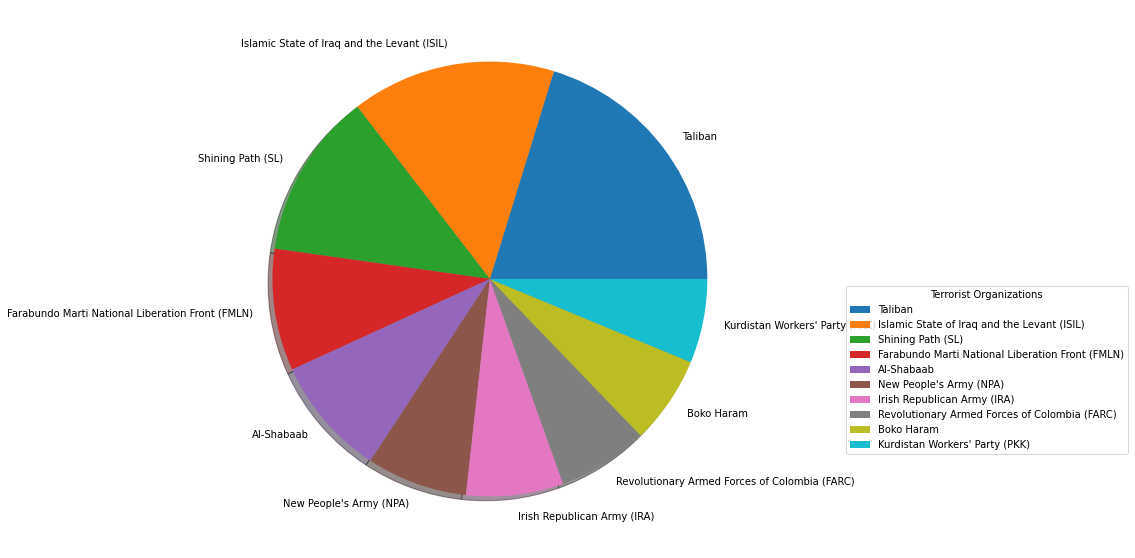

In [101]:
# Plotting the acquired data frame:

plt.subplots(figsize=(10,10))
plt.pie(lead_terrorist_groups['Number of Attacks'], labels = pilabels,startangle=0,shadow =True)
plt.legend(pilabels,title='Terrorist Organizations',bbox_to_anchor=(1,0.5),loc="upper left", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.show()

**INSIGHTS:**

The above pie chart shows us that the majority of the attacks are done by **Taliban** followed by **ISIL** and **Shining Path** closely.

The mentioned 10 Terrorist groups can be definately be stated as **Active Contributers** in the global unrest.


*  Prevalent Modes of Attack.
  The attacking methodologies used by the majority of the terrorist groups can be seen in the following graph.

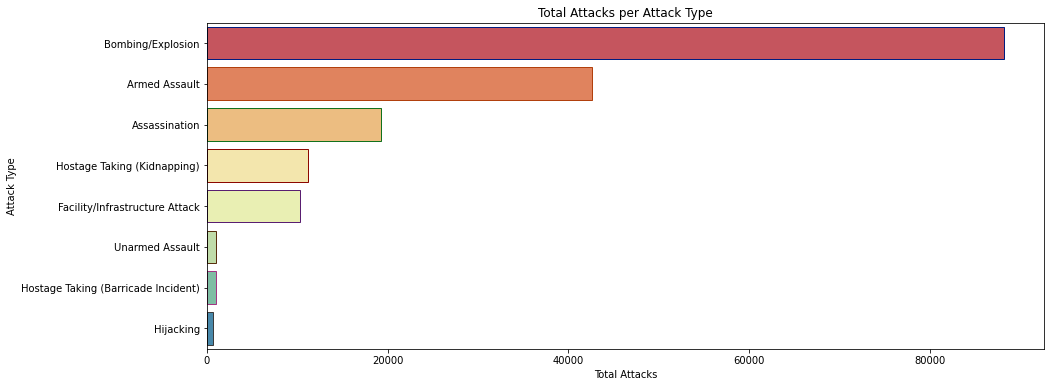

In [102]:
attack_type = data.AttackType.value_counts().to_frame().drop('Unknown').reset_index()[:10]
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(y=attack_type['Attack Type'], x=attack_type['Total Attacks'], palette='Spectral',
            edgecolor=sns.color_palette('dark', 10))
plt.title('Total Attacks per Attack Type')
plt.show()

**INSIGHTS**

The above graph shows us that the majorly used attacking mode is Bombing, followed by Armed Assaults and Assassinations. 

The later types of attacks are more focused towards individuals or smaller groups rather than general public.

Although the same cannot be said for Hijacking.

# Utility Functions :

Now that we have understood how the world is affected by terrorism, we need to focus on some particular countries who have significant activities. In order to carry out this process, we need to have something that will make the redundant process of analysing countries easier. Let's create some utility functions that will help us do the job faster.

The Utility Function **get_country_report(args)** takes the country name as an argument and returns a comprehensive report for that given contry.

**The report consists of -**

* ***Year Wise Attack Analysis:*** Here we get a simple line chart, portraying the increase or decrease in the attacks with time on that particular country.

* ***Heat Density Map:*** This is a mapbox plot which gives us a graphical representation of the attacks in that particular region. The brighter spots on the map represent the recent attacks, while the darker spots represent the older attacks.

* ***Highly Affected Cities:*** This is yet another simple stem graph, which plots the 'cities vs number of attacks' graph. Here we get the highly affected cities to the left and lesser affected cities as we move to right.

* ***Lead Terrorist Organizations:*** This is a pie chart which divides the whole pie into pieces. Here every piece of pie represents an organization, and bigger the size of the piece,bigger the damaging presence of the terrorist group. We get some precise information about the trouble makers of the region. This will help us later, where we will analyse that particular terrorist group.

* ***Attack Type Analysis:*** This is again a simple horizontal bar graph which precisely shows the most preferred type of attack. Knowing the preferred type of attacks is really important as it will let the Armed forces and Police be vigilant towards that attack and take precautionary measures.

In [103]:
# Creating a Utility Function for analysis of each country. This will help us reduce the redundant coding for each country.

def get_country_report(country):
  ''' This function will take country as an argument and will return a comprehensive report for the said country.'''
  # Get the data for the mentioned country.
  country_sub_data = data.loc[(data["Country"] == str(country)),["eventid","Year","Country","Region","city","latitude","longitude","AttackType","Killed","Wounded","Casualties","Group","Weapon_type","Motive","success"]]
  
  
  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Getting the Trend of terrorist attacks to understand the increase or decrease of attacks in the country.
  yearly_attacks = country_sub_data["Year"].value_counts().sort_index(ascending=True)
  plt.subplots(figsize=(15,6))
  yearly_attacks.plot()
  plt.title('Year wise trend in attacks')
  plt.ylabel('Number Of Attacks')
  plt.xlabel('Years')
  plt.show()
  
  
  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Getting the heat density map for the affected regions in the country.
  mapdata = country_sub_data[['Year','Country','latitude','longitude']]
  fig = px.density_mapbox(mapdata,
                        lat='latitude',
                        lon='longitude', 
                        z='Year', 
                        radius=1,
                        center=dict(lat=22.804567, lon=86.202875), 
                        zoom=3,
                        mapbox_style="open-street-map",
                        title='Attack Density Map')

  fig.show()
  print(f'The above figure shows us the affected regions of the {country}')

  
  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Figuring our the highly affected cities of the country.
  city_attacks = country_sub_data.city.value_counts()[:11].drop('Unknown').reset_index()
  city_attacks.columns=['City','Total Attacks']
  x = city_attacks.City
  y = city_attacks['Total Attacks']
  fig, ax = plt.subplots(figsize=(15,6))
  ax.stem(x, y,use_line_collection=True)
  plt.show()

  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Getting an understanding of predominant terrorist groups with higher number of attacks.
  lead_terrorist_groups = country_sub_data.Group.value_counts().to_frame().drop('Unknown').reset_index()[:10]
  lead_terrorist_groups.columns=['Terrorist Organization','Number of Attacks']
  # Creating a list of labels for the Pie chart
  pilabels=list(lead_terrorist_groups['Terrorist Organization'].unique())
  plt.subplots(figsize=(7,7))
  plt.pie(lead_terrorist_groups['Number of Attacks'], labels = pilabels,startangle=0,shadow =True)
  plt.legend(pilabels,title='Terrorist Organizations',bbox_to_anchor=(1,0.5),loc="upper left", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
  plt.show()


  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # The following will help us find out the attack types followed by the organizations.
  attack_type = country_sub_data.AttackType.value_counts().to_frame().reset_index()[:10]
  attack_type.columns = ['Attack Type', 'Total Attacks']
  plt.subplots(figsize=(15,6))
  sns.barplot(y=attack_type['Attack Type'], x=attack_type['Total Attacks'], palette='Spectral',
              edgecolor=sns.color_palette('dark', 10))
  plt.title('Total Attacks per Attack Type')
  plt.show()


The Utility Function **get_terrorist_report(args)** takes the organization name as an argument and returns a comprehensive report for that given organization.

The report consists of -

* ***Yearly Attack Analysis:*** This analysis will be presented using a simple line chart. This chart will show the number of attacks carried out by that certail group over the years.

* ***Region Wise Activity:*** This will present a graphical view of the actively attacked regions by the terrorist organization. Although the attack will not be restricted to a certain region or country. If the terrorist organization is active in multiple countries, it will also be shown in the map.

* ***Countries Affected by the Terrorist Organization:*** A simple stem graph will represent the countries affected by the said organization along with number of attacks in the respective country.

* ***Casualty Count per Year:*** This bar graph presents an overview of the number of casualties occuring per year due to that particular terrorist organization.

* ***Prefered Attack Type:*** This simply shows the preferred type of attack, done by the terrorist organization over the years.

* ***Success Rate:*** This is a simple pie chart that shows, how successfull the terrorist organization was in its attacks over the years. Here the failure rate can also be seen as the success rate of the Armed Forces or Police to get the situation under control.


In [104]:
# Creating a utility function for getting a deeper analysis on each terrorist group. 

def get_terrorist_report(group):
  ''' This function will take terrorist group name as an argument and will return a comprehensive report for the said organization.'''
  # Get the data for the mentioned terrorist group.
  group_sub_data = data.loc[(data["Group"] == str(group)),["eventid","Year","Country","Region","city","latitude","longitude","AttackType","Killed","Wounded","Casualties","Group","Weapon_type","Motive","success"]]
  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # First let us understand the activity trend of the organization.
  yearly_attacks = group_sub_data["Year"].value_counts().sort_index(ascending=True)
  plt.subplots(figsize=(15,6))
  yearly_attacks.plot()
  plt.title('Year wise trend in attacks')
  plt.ylabel('Number Of Attacks')
  plt.xlabel('Years')
  plt.show()
  
  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Finding the region of operation for the said terrorist group.
  mapdata = group_sub_data[['Year','Country','latitude','longitude']]
  fig = px.density_mapbox(mapdata,
  lat='latitude',
  lon='longitude', 
  z='Year', 
  radius=2,
  center=dict(lat=22.804567, lon=86.202875), 
  zoom=3,
  mapbox_style="open-street-map")
  fig.show()

  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Affected Countries and Number of Attaccks
  country_attacks = group_sub_data.Country.value_counts()[:11].reset_index()
  country_attacks.columns=['Country','Total Attacks']
  x = country_attacks.Country
  y = country_attacks['Total Attacks']
  fig, ax = plt.subplots(figsize=(15,6))
  ax.stem(x, y,use_line_collection=True)
  plt.ylabel('Number Of Attacks')
  plt.xlabel('Countries Affected')
  plt.show()

  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Casualties over the years. 
  plt.subplots(figsize=(15,6))
  year_casualties = group_sub_data.groupby('Year').Casualties.sum().to_frame().reset_index()
  year_casualties.columns = ['Year','Casualties']
  sns.barplot(x=year_casualties.Year, y=year_casualties.Casualties, palette='mako',edgecolor=sns.color_palette('dark',10))
  plt.xticks(rotation=90)
  plt.title('Number Of Casualties Each Year')
  plt.show()  


  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Choice of Attack for the selected organization. 

  attack_type = group_sub_data.AttackType.value_counts().to_frame().drop('Unknown').reset_index()[:10]
  attack_type.columns = ['Attack Type', 'Total Attacks']
  plt.subplots(figsize=(15,6))
  sns.barplot(y=attack_type['Attack Type'], x=attack_type['Total Attacks'], palette='mako',
              edgecolor=sns.color_palette('dark', 10))
  plt.title('Total Attacks per Attack Type')
  plt.show()

  # -------------------------------------------------------------------------------------------------------------------------------------------------------
  # Success rate of the said organization.
  
  success_rate = group_sub_data.success.value_counts().to_frame().reset_index()
  success_rate.columns=['Terrorist Group','Number of successful attacks']
  pilabels=["Success","Failure"]
  plt.subplots(figsize=(10,10))
  plt.pie(success_rate['Number of successful attacks'], labels = pilabels,startangle=0,shadow =True,autopct='%1.1f%%',colors = ['#ff6666', '#ffcc99'])
  plt.legend(pilabels,title='Success Rate',bbox_to_anchor=(1,0.5),loc="upper left", fontsize=10, 
            bbox_transform=plt.gcf().transFigure)
  plt.show()


  # -------------------------------------------------------------------------------------------------------------------------------------------------------



# Detailed Analysis on a Country:

Here we will be focusing on a country of our choice and will be analysing the report generated by the **Utility Functions** . Let us analyse the country: **IRAQ**

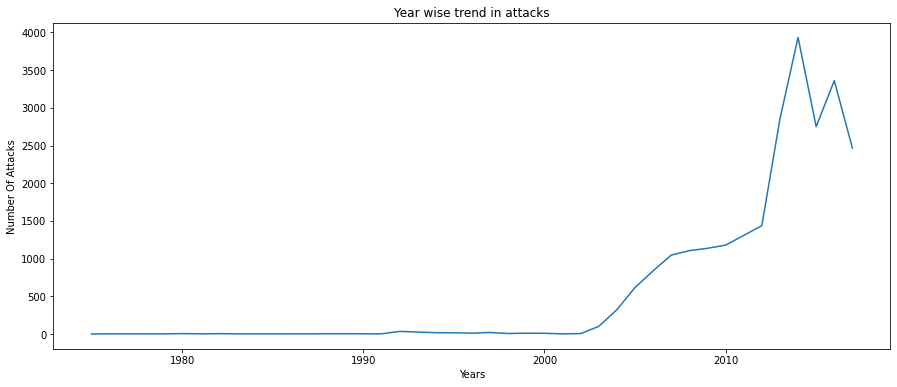

The above figure shows us the affected regions of the Iraq


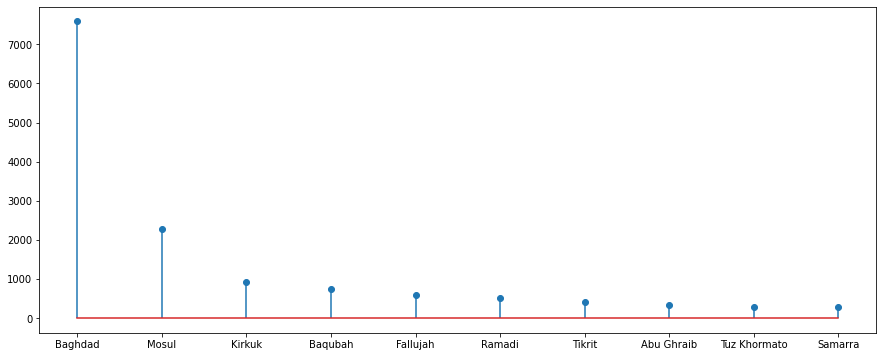

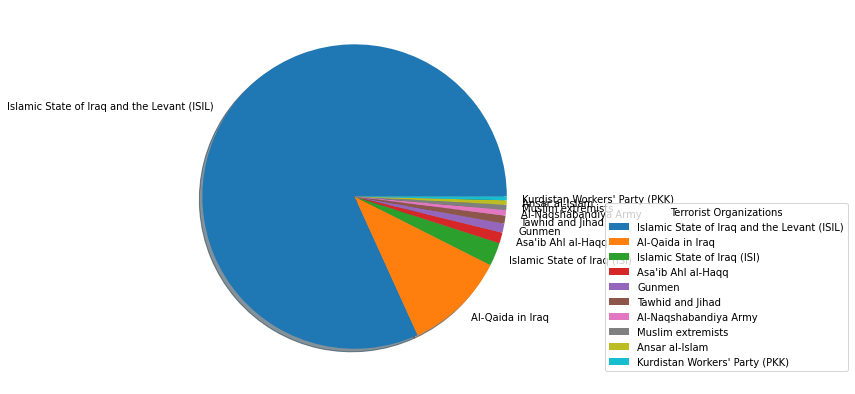

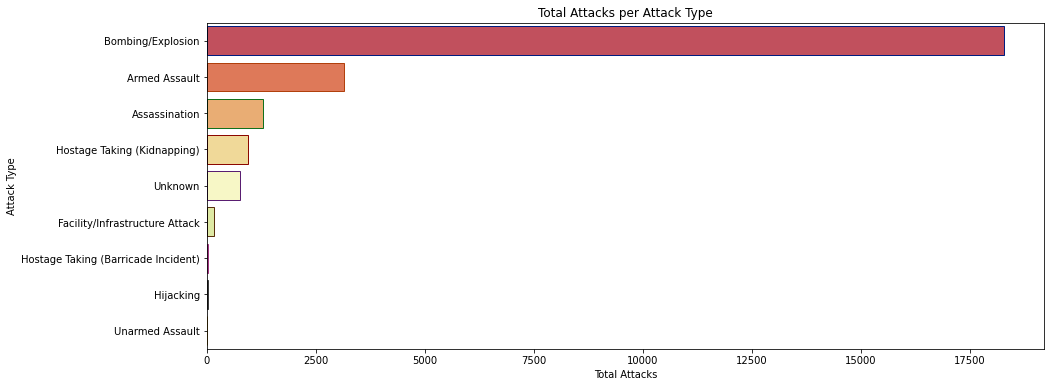

In [105]:
get_country_report("Iraq")

# INSIGHTS & CONCLUSIONS on IRAQ:

  Looking at the world terrorism report that we worked on earlier, we can see that **Iraq** has been the most affected country by terrorism. Hence we made the choice to study this particular country. 

  Now, lets see what the country report is trying to present us.



1.   **Attacks Trend:** 

  The first chart shows a linear growth in terrorist activities from the year 2000 to 2012. This could have been because of the Financial Crisis of that period and also excessive rise in the creation of terrorist organization in the same period.

  This trend took an exponential growth from there onwards i.e. from 2012-13 to 2015-16 followed by a reduction in activities for a small period of time before increasing again in 2016-17.

  Needless to say, Iraq has been suffering a lot from the past two decades. 


2. **Attack Density Map:**

  This map is a graphical representation of attacks in the country that happened over the years. The brighter spots represent the recent attacks that have been made, while the darker sports represent the older attacks. 
  
  Looking at the map we can see that the **older attacks** appear at the **border of the country**. 

  The **newer attacks*** appear at the major cities of the country i.e. in the **heart of the country**. This can be helpfull to trace where the organizations originated from. This also shows the current operation of the organizations. 

3. **Most Attacked Cities:**

  This is a simple stem graph which represents the most attacked cities of the country. As we observed in the earlier map, the center of the country is highly attacked in the recent times. This happens to be **Baghdad** which is the capital of the country. The later two cities that were most attacked are **Mosul** and **Kirkuk** which are to the Northern part of the country. These cities also happen to hold a lot of importance for trading and ethnic diversity.

4. **Major Troublemakers:**

  The country has seen a lot of violece from the beginning of the 2000s and the violence has just shown an uptrend. In this pie chart, we can see the major contributors of that violence.

  The most attacks are carried out by **Islamic State of Iraq and the Levant** followed by **Al-Quaida in Iraq**. We will be studying these terrorist organization and their modes of operations in the further part where we will make comprehensive reports on each organization.

5. **The Modes of Attack:** 

  Here we can see the modes or types of attacks carried out by the terrorist organizations. The most common mode of attack is **Bombing and Explosion** followed by **Armed Assault** and **Assassination** . The number of attacks done using Bombing and Explosion is very high as compared to its subsequent modes of attacks.


# Further Examination: 
Now that we understand how badly **Iraq** is affected by terrorist activities, we shall dive deeper into the organizations which are creating the chaos. 

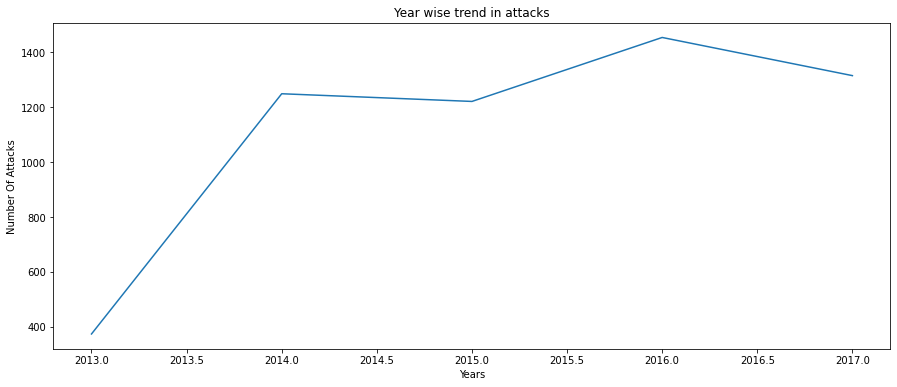

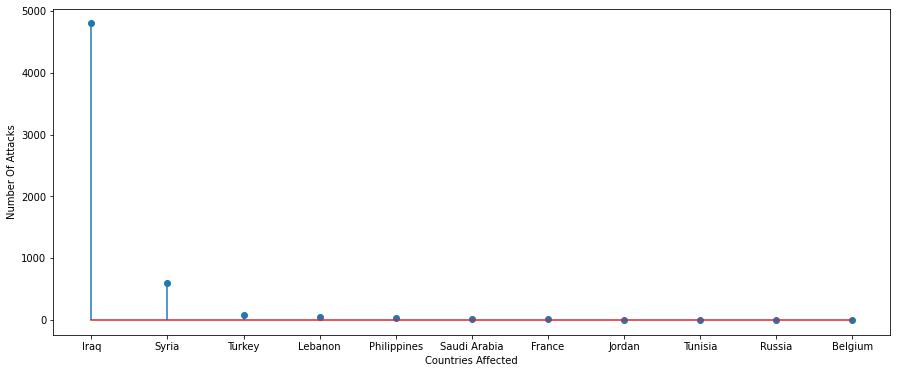

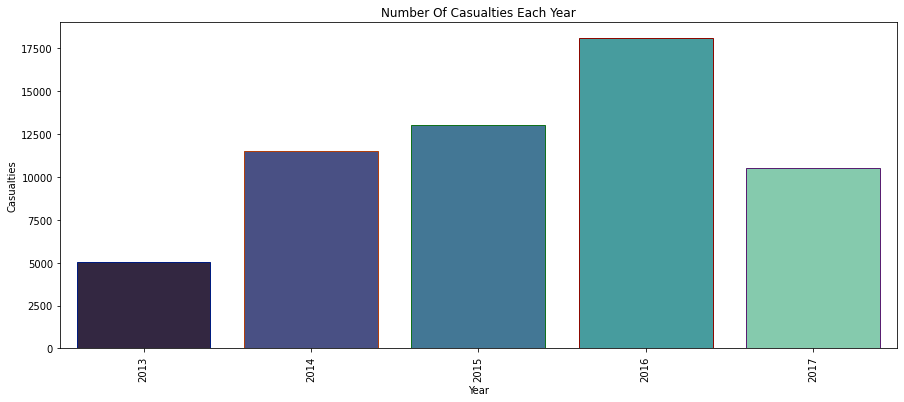

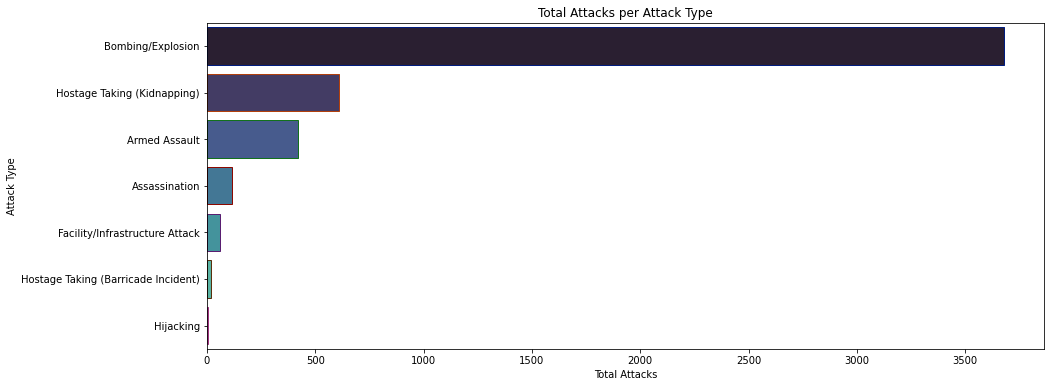

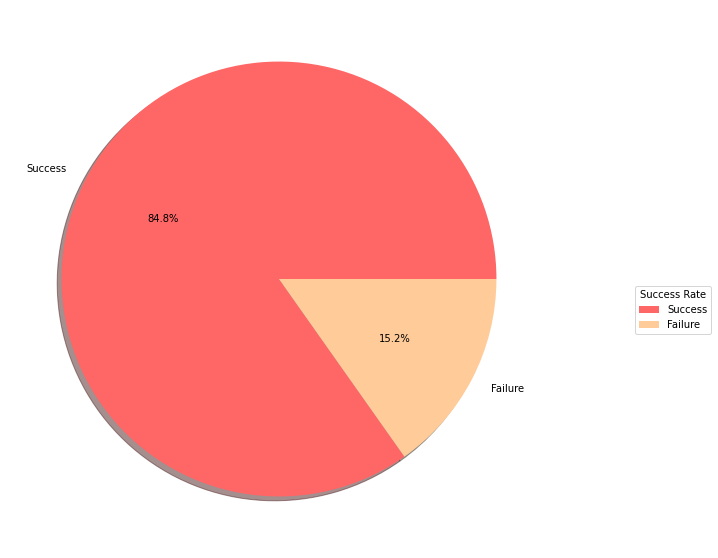

In [106]:
get_terrorist_report("Islamic State of Iraq and the Levant (ISIL)")

# INSIGHTS & CONCLUSIONS: 
  ISIL has been the most frequent attacker in the country of Iraq. Let us analyse the above generated report.
1.   **Attack Trend:** 

 We can see that the first line chart shows readings from the year 2013. The line has done nothing but climb over the years. The attacks have been gradually decreasing from the year 2016. 
2.   **Regions Affected by the Organization:**

 Looking at the map we can see that the organization has carried out attacks in multiple countries. We can see major spots in Iraq followed by some attacks in Syria. We will get a clearer understanding by looking the following stem graph.

3.   **Countries Affected by the Organization:**
  
  The simplest form of graph here is giving us most of the information about the whole scenario. Looking at the graph we can see that Iraq, Syria and Turkey are the countries affected most by these attacks.

4.   **Yearly Casualties:**
  
  As observed in the first trend line graph, we saw that the attacks started in the year 2013 and started climbing exponentially. Here we see the same with the casualties graph. The attacks started in the year 2013 with about 5000 casualties. The number doubled and kept on increasing in the following years. The number trippled in the third year, also being the highest of all time. The only next year's record that we have is of 2017, and that has a lower number.

5.   **Choice Of Attack:**

  We need to understand the modes of attack that this organization carries out. By this information, the forces will be able to secure the major attack sites and also take some preventive measures for anything such to happen.

  We can see that the major mode of attack followed by this organization is like everybody else i.e. 'Bombing and Explosion'. Unlike the world analysis, here we see that the organization is more interested in Hostage Taking(Kidnapping) than Armed Assault.

6.   **Success Rate:**

  The organization has done numerous attacks in various countries. The success rate of the organization is very high at 84.8%. This shows that the terrorist organization is very keen with its operation and barely leaves a chance to be intercepted. The interception or the failure to attack has occured for 15.2%, which is a small number but shows that the efforts are being made to control and diminish the attacks. 

  Considering that the terrorist organization came into existence in 2013, the  defending forces have really less information to study and react to. The decline in the attacks from the year 2017 can be contributed to the advancement in the operations of the defensive forces.




# Detailed Analysis on a Country:

Here we will be focusing on a country of our choice and will be analysing the report generated by the **Utility Functions** . Let us analyse the country: **PAKISTAN**

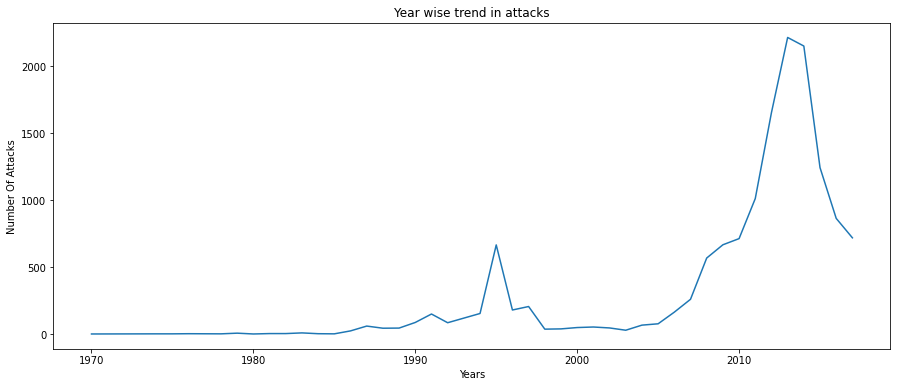

The above figure shows us the affected regions of the Pakistan


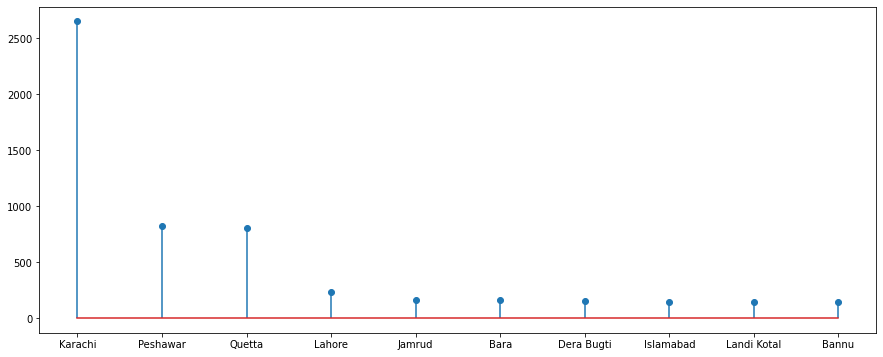

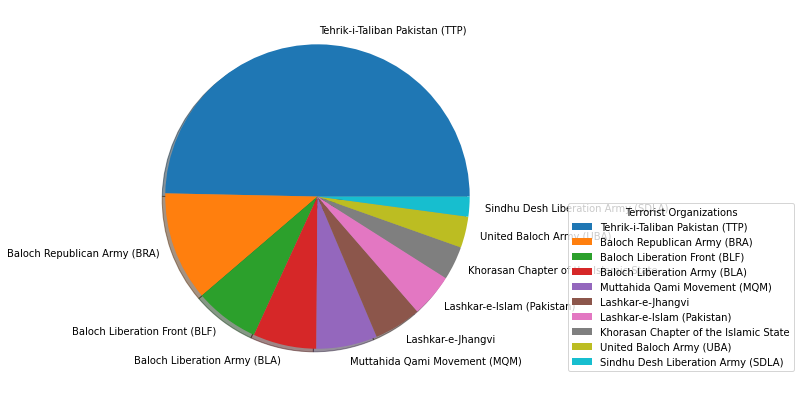

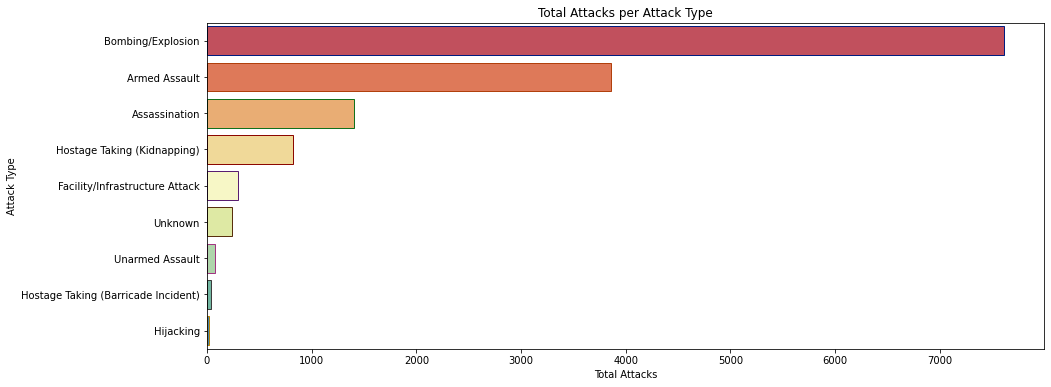

In [107]:
get_country_report("Pakistan")

# INSIGHTS & CONCLUSIONS on PAKISTAN:

  Looking at the world terrorism report that we worked on earlier, we can see that **Pakistan** has been the second most affected country by terrorism. Hence we made the choice to study this particular country. 

  Now, lets see what the country report is trying to present us.



1.   **Attacks Trend:** 

  The first chart shows us that the country saw some attacks between 1990 and 2000, forming a sudden spike. Pakistan was fairly peacefull before 1990 as we see no major attacks.

  Post the year 2000 the country shows an exponential growth in number of attacks. The peak of attacks can be seen in the first half of the decade. After attaining the peak number of attacks, the chart also shows an exponential decrease in the number of attacks.

  Pakistan has been ranked second on the most attacked countries, this suggests that the attacks occuring between 2005 and 2017 would have caused a lot of damage and casualties. Concentration of so many attacks in such a small period is too much to declare the country with peace. 


2. **Attack Density Map:**

  This map is a graphical representation of attacks in the country that happened over the years. The brighter spots represent the recent attacks that have been made, while the darker sports represent the older attacks. 
  
  Looking at the map we can see that the **older attacks** appear equally distributed around the country. The older attacks can be seen from the year 1970 which was the period just before Indo-Pak war.  

  The **newer attacks*** appear at the major cities of the country i.e. in the **heart of the country**. Karachi, Lahore and some area surrounding Peshawar is showing a high density of attacks. 

3. **Most Attacked Cities:**

  This is a simple stem graph which represents the most attacked cities of the country. 
  The largest city of Pakistan,**Karachi** has seen the most number of attacks in the country. It is not the capital of the country, but it is a financial and industrial hub of the country.
  **Peshawar** and **Quetta** hold the second and third position respectively as the most attacked cities. The proximity of the cities with Afghanistan says it all. The attacks happening in these cities are still one third of the attacks experienced by Karachi.

4. **Major Troublemakers:**

  The country has experienced a lot of violence in a very short amount of time. The majority of attacks being carried out in Karachi, Peshawar and Quetta. Here in this pie chart we will see the major terrorist groups as per the number of attacks by them.

  Almost **50%** of attacks have been done by **Tehrik-i-Taliban Pakistan (TTP)** followed by **Baloch Republican Army**. We will be studying these terrorist organization and their modes of operations in the further part where we will make comprehensive reports on each organization.

5. **The Modes of Attack:** 

  Here we can see the modes or types of attacks carried out by the terrorist organizations. The most common mode of attack is **Bombing and Explosion** followed by **Armed Assault** and **Assassination** . The number of attacks done using Bombing and Explosion is very high as compared to its subsequent modes of attacks.


# Further Examination: 
Now that we understand how badly **Pakistan** is affected by terrorist activities, we shall dive deeper into the organizations which are creating the chaos. 

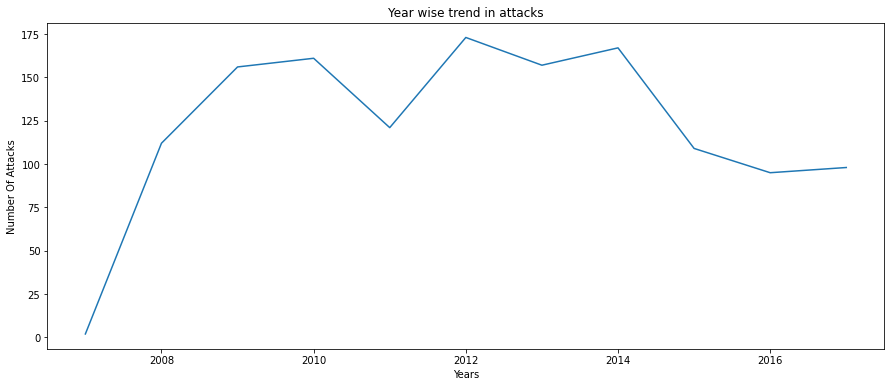

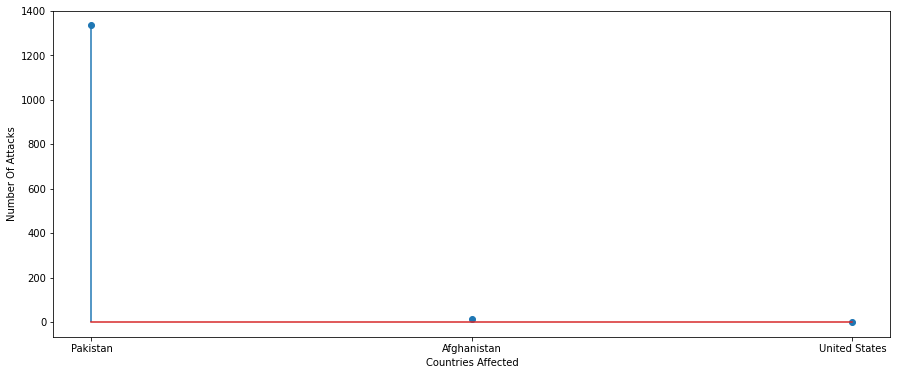

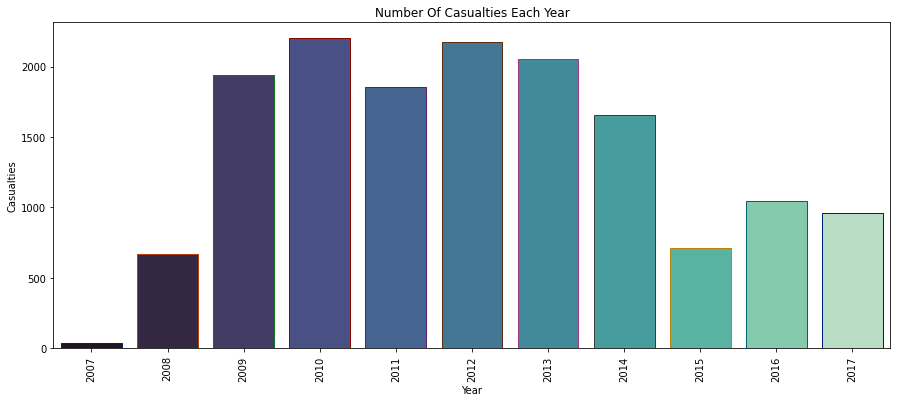

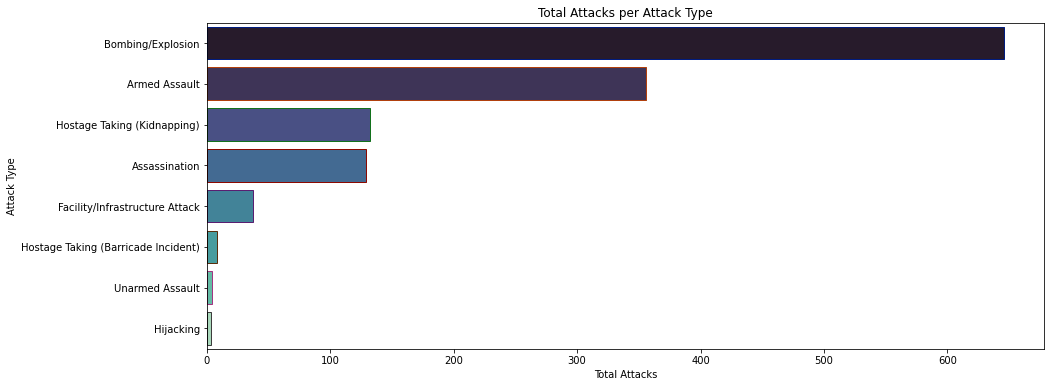

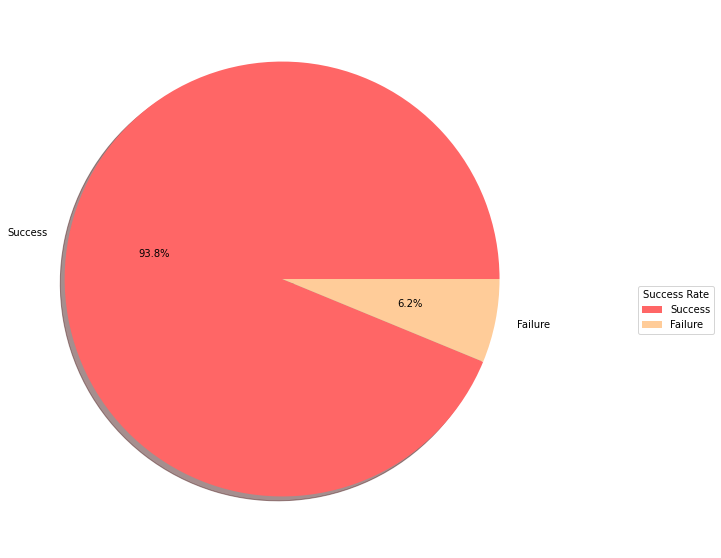

In [108]:
get_terrorist_report("Tehrik-i-Taliban Pakistan (TTP)")

# INSIGHTS & CONCLUSIONS: 
  Tehrik-i-Taliban Pakistan (TTP) has been the most frequent attacker in the country of Pakistan. Let us analyse the above generated report.
1.   **Attack Trend:** 

 We can see that the first line chart shows readings from the year 2007. We saw in the earlier trend graph generated by the country report, that the country suffered the most between 2005 to 2017. 
 The rise of TTP also started in the same time i.e. 2007. The number of attacks reached their peak within two years of establishment. They show a consistent number of attacks throughout the period.
2.   **Regions Affected by the Organization:**

 Looking at the map we can see that the organization has carried out attacks in the northern part of Pakistan where we have Peshawar and Quetta. We can also observe some major spots at Karachi. The attacks at Karachi seem more recent. 

3.   **Countries Affected by the Organization:**
  
  The simplest form of graph here is giving us most of the information about the whole scenario. Looking at the graph we can see that TTP has its major presece in Pakistan only. It has carried out some attacks in Afghanistan and very few in United States. We can comfortably say that the world wide presence of this organization is close to none.

4.   **Yearly Casualties:**
  
  Pakistan has seen attack spikes only two times in this whole data i.e. in between 1990-2000 and 2010-2017. We can see the casualties for the last decade where a sudden rise from 2009 can be seen.
  Highest number of casualties have been recorded in the year 2010 followed by 2012. Post the year 2012, casualties have shown a decline.

5.   **Choice Of Attack:**

  We need to understand the modes of attack that this organization carries out. By this information, the forces will be able to secure the major attack sites and also take some preventive measures for anything such to happen.

  We can see that the major mode of attack followed by this organization is like everybody else i.e. 'Bombing and Explosion'. The second most preferred mode of attack is Armed Assault followed by Kidnapping.

6.   **Success Rate:**

  TTP has a success rate of 93.8% which is way to high for any terrorist organization. Considering the first attack by this organization was reported in 2007, the organization has been able to cause a lot of terror in just 10 years of it's existence.
  This indicates a poor or rather inefficient defence forces of the country. The intelligence and armed forces of the country should be responsible for sniffing out any such dangers in the country. Looking at the success rate of just one terrorist organization, we can say that the country needs to reinforce its defence forces.




# FINAL SUMMARY OF THE CONCLUSION:

# WORLD ANALYSIS:

  Looking at the examination performed in whole, we can say that **terrorist attacks** have stayed steady until the early 2000's. The growth in the attacks increased linearly till the year 2010. 

  We see an exponential growth post the year 2010's which may or may not have been caused due to the financial crisis and political disturbance going on over the world.

  The world analysis shows us that the **Middle East & North Africa** followed by **South Asia** are the most affected regions. We further tried to get the highly affected countries in these regions.

  The most affected countries are **Iraq, Pakistan and Afganistan** in that order. **Iraq** is affected very highly as compared to Pakistan. So, we ended up analysing the country of **Iraq** in the further analysis.

  The world's largerst trouble makers turned out to be **Taliban** and **ISIL** which also happened to be active in Iraq. 

  Overall in the world, the most preferred way of attack is **Bombing and Explosions** followed by **Armed Assaults**.

# IRAQ ANALYSIS:

  We did a similar comprehensive review of Iraq as it is the highly affected country and here are the findings:



1.   **Attack Trends:**
Attacks in Iraq were consistently increasing from the year 2000 to 2010. Post 2010 the country saw a sudden rise in the attacks which peaked post year 2015.This trend shows a down in the recent years.
2.   **Most Attacked Cities:**
The most attacked cities happen to be **Baghdad, Mosul and Kirkuk.**All the three cities hold a certain political importance.
3. **Active Terrorist Organizations:**
The highly active and the most damaging terrorist groups are **ISIL** and **Al-Quaida in Iraq**. The preferred type of attack by these organizations can be seen as **Bombimg and Explosions** as they account for more than 18000 attacks.

# ISIL ANALYSIS:

Iraq has been suffering from terrorist attacks from a while now and ISIL happens to be the major contributor to this chaos. ISIL stands for **Islamic State of Iraq and the Levant**.

As per the data provided to us, we can see that the operations of this group started in the year 2013. The group started the attacks in the year 2013 but managed to do more than 1300 attacks within a year. The sudden rise must have some reason which we cannot conclude from the present information.

The attacks have been consistent since then and show a minor decline in the recent years.

The organization has not only operated in **Iraq** but also in **Syria** and **Turkey** followed by some other countries like **Russia** with very small number of attacks. This shows us the reach of this organization. It is a fairly dangerous terrorist group.

The highest number of casualties were observed in the year **2016** with **Bombing and Explosions** again being the choice of attack followed by **Kidnapping and Hostage Taking**.

The terrorist organization has a success rate of 84.8% which indicated the deadliness of the organization.






# PAKISTAN ANALYSIS:

  We did a similar comprehensive review of Pakistan as it is the second highest affected country and here are the findings:



1.   **Attack Trends:** The country has seen two sudden spikes in the attacks one between 1990-2000 and the other between 2010-2017.
  


2.   **Most Attacked Cities:** **Karachi, Peshawar, Quetta** have been the most attacked cities in that order. All three cities hold a certain importance in terms of political power or industrial power.



3. **Active Terrorist Organizations:**The highly active and the most damaging terrorist groups are **Tehrik-i-Taliban Pakistan** and **Baloch Republican Army**. The preferred type of attack by these organizations can be seen as Bombimg and Explosions as they account for more than 7500 attacks.




# Tehrik-i-Taliban Pakistan (TTP) ANALYSIS:

Pakistan has seen two spikes in the attacks in the 1990-2000 and 2010-2017 periods. The latter were done by TTP.

As per the data, we can see that the operations of this organization started in the year 2007. The group managed to do more than 100 attacks within a year.

The attacks have been prominent in the last decade only and have been gradually decreasing.

This organization has operated **Pakistan**,**Afghanistan** and **United States**. The attacks in United States were just a couple, but this goes to show the reach of TTP.

The highest number of casualties were observed in the year 2010 and 2012 with **Bombing and Explosions** being the choice of attack.

The terrorist organization has a success rate of 93.8% which is very high. This clearly indicated the lack of intelligence and quick response of the  defensive forces. 






